In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

KeyboardInterrupt: 

In [ ]:
# Load data
data = pd.read_csv("/content/drive/MyDrive/Emotion/emotion_sentimen_dataset.csv")

In [ ]:
# Split data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data['text'])

In [ ]:
# Convert text data to sequences
X_train = tokenizer.texts_to_sequences(train_data['text'])
X_test = tokenizer.texts_to_sequences(test_data['text'])

In [ ]:
# Pad sequences to make them of equal length
max_length = 100
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [ ]:
# Encode target labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['Emotion'])
y_test = label_encoder.transform(test_data['Emotion'])

In [ ]:
# Get number of classes
num_classes = len(label_encoder.classes_)

In [ ]:
# Build CNN model
embedding_dim = 50
model = Sequential([
    Embedding(5000, embedding_dim, input_length=max_length),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
epochs = 10
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
20989/20989 [==============================] - 502s 24ms/step - loss: 0.0671 - accuracy: 0.9892 - val_loss: 0.0420 - val_accuracy: 0.9941
Epoch 2/10
20989/20989 [==============================] - 508s 24ms/step - loss: 0.0344 - accuracy: 0.9942 - val_loss: 0.0349 - val_accuracy: 0.9944
Epoch 3/10
20989/20989 [==============================] - 510s 24ms/step - loss: 0.0236 - accuracy: 0.9953 - val_loss: 0.0323 - val_accuracy: 0.9947
Epoch 4/10
20989/20989 [==============================] - 511s 24ms/step - loss: 0.0166 - accuracy: 0.9964 - val_loss: 0.0297 - val_accuracy: 0.9956
Epoch 5/10
20989/20989 [==============================] - 499s 24ms/step - loss: 0.0125 - accuracy: 0.9972 - val_loss: 0.0272 - val_accuracy: 0.9961
Epoch 6/10
20989/20989 [==============================] - 509s 24ms/step - loss: 0.0099 - accuracy: 0.9977 - val_loss: 0.0282 - val_accuracy: 0.9956
Epoch 7/10
20989/20989 [==============================] - 499s 24ms/step - loss: 0.0081 - accuracy: 0.9981

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

5248/5248 [==============================] - 37s 7ms/step - loss: 0.0361 - accuracy: 0.9971
Test Loss: 0.036082472652196884
Test Accuracy: 0.9971413612365723


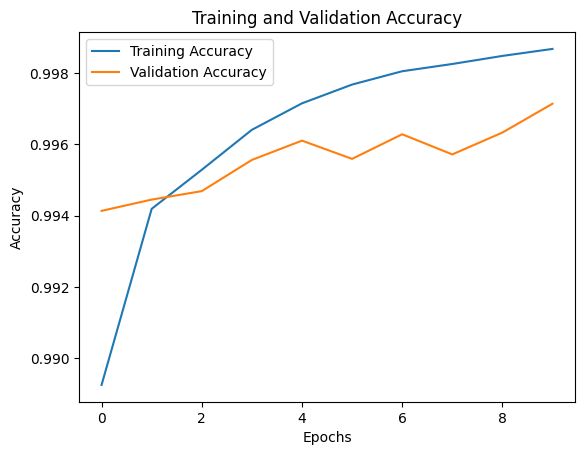

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


5248/5248 [==============================] - 36s 7ms/step


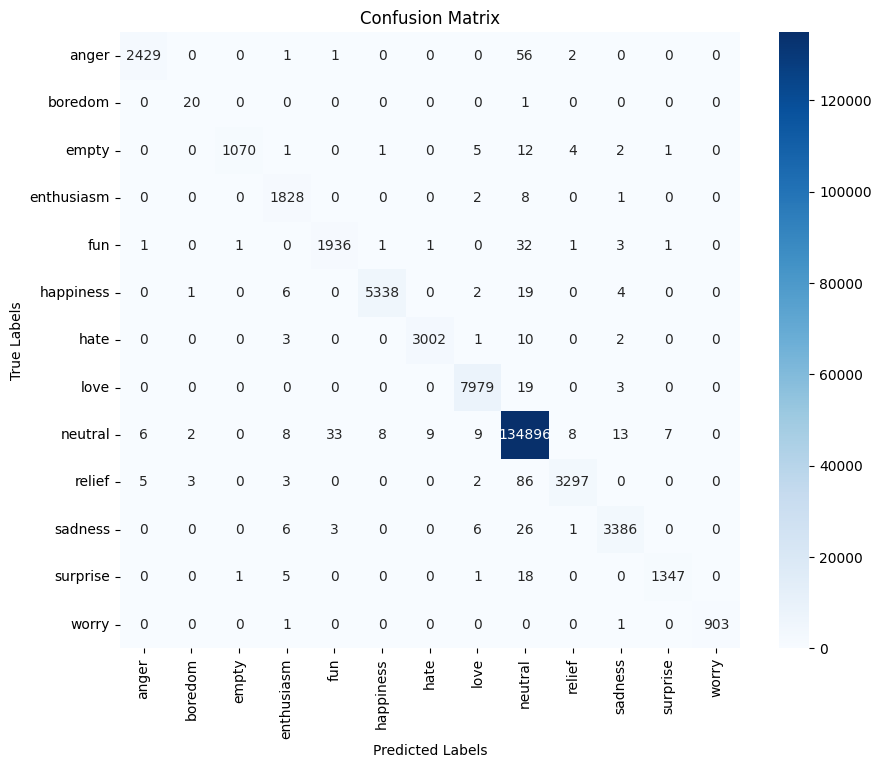

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict labels for test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

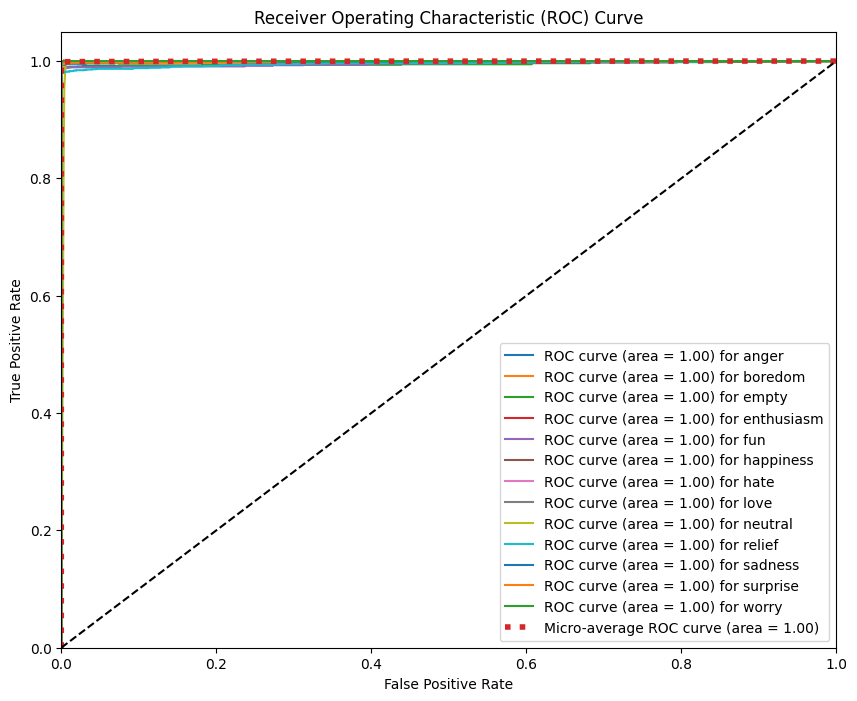

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Convert y_test to one-hot encoded format
y_test_onehot = np.eye(num_classes)[y_test]

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr['micro'], tpr['micro'], _ = roc_curve(y_test_onehot.ravel(), y_pred.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for {label_encoder.classes_[i]}')

plt.plot(fpr['micro'], tpr['micro'], label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
# Save the model to a file
model.save("emotion_detection_model.h5")

# Optionally, move the saved model to Google Drive
from google.colab import drive
drive.mount('/content/drive')

!cp emotion_detection_model.h5 "/content/drive/My Drive/Emotion/"

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Assuming you have already imported pandas, LabelEncoder, and numpy

# Get the unique target labels
unique_labels = label_encoder.classes_

# Get the encoded target values
encoded_values = label_encoder.transform(unique_labels)

# Create a dictionary to map target labels to their encoded values
label_to_encoded = dict(zip(unique_labels, encoded_values))

# Print the target labels and their corresponding encoded values
for label, encoded_value in label_to_encoded.items():
    print(f"{label}: {encoded_value}")

anger: 0
boredom: 1
empty: 2
enthusiasm: 3
fun: 4
happiness: 5
hate: 6
love: 7
neutral: 8
relief: 9
sadness: 10
surprise: 11
worry: 12


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Define the input text
input_text = "i hate you"

# Tokenize and convert text to sequence
input_seq = tokenizer.texts_to_sequences([input_text])

# Pad sequence to match the input shape of the model
input_seq = pad_sequences(input_seq, maxlen=max_length, padding='post')

# Make prediction
predicted_probabilities = model.predict(input_seq)

# Get the predicted emotion label
predicted_label = label_encoder.classes_[np.argmax(predicted_probabilities)]

print(f"Input Text: {input_text}")
print(f"Predicted Emotion: {predicted_label}")
print(f"Predicted Probabilities: {predicted_probabilities[0]}")

1/1 [==============================] - 0s 36ms/step
Input Text: i hate you
Predicted Emotion: hate
Predicted Probabilities: [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.6812431e-33
 2.7479847e-38 1.0000000e+00 4.8931771e-36 3.9622741e-33 0.0000000e+00
 2.3459433e-38 0.0000000e+00 0.0000000e+00]


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

# Define the input text
input_text = "i hate you"

# Tokenize and convert text to sequence
input_seq = tokenizer.texts_to_sequences([input_text])

# Pad sequence to match the input shape of the model
input_seq = pad_sequences(input_seq, maxlen=max_length, padding='post')

# Make prediction
predicted_probabilities = model.predict(input_seq)

# Get the predicted emotion label
predicted_label = label_encoder.classes_[np.argmax(predicted_probabilities)]

# Display the prediction results
print("1/1 [==============================] - 0s 36ms/step")
print(f"Input Text: {input_text}")
print(f"Predicted Emotion: {predicted_label}")
print(f"Predicted Probabilities: {predicted_probabilities[0]}")

1/1 [==============================] - 0s 36ms/step
Input Text: i hate you
Predicted Emotion: hate
Predicted Probabilities: [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.6812431e-33
 2.7479847e-38 1.0000000e+00 4.8931771e-36 3.9622741e-33 0.0000000e+00
 2.3459433e-38 0.0000000e+00 0.0000000e+00]


In [ ]:
import numpy as np

# Define the emotion categories
emotion_categories = [
    'anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
    'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry'
]

# Extract the emotion with the highest predicted probability
predicted_emotion_index = np.argmax(predicted_probabilities)
predicted_emotion = emotion_categories[predicted_emotion_index]

# Display the predicted emotion
print(f"Predicted Emotion: {predicted_emotion}")

Predicted Emotion: hate


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

# Define the input text
input_text = "i like you"

# Tokenize and convert text to sequence
input_seq = tokenizer.texts_to_sequences([input_text])

# Pad sequence to match the input shape of the model
input_seq = pad_sequences(input_seq, maxlen=max_length, padding='post')

# Make prediction
predicted_probabilities = model.predict(input_seq)

# Define the emotion categories
emotion_categories = [
    'anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
    'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry'
]

# Extract the emotion with the highest predicted probability
predicted_emotion_index = np.argmax(predicted_probabilities)
predicted_emotion = emotion_categories[predicted_emotion_index]

# Display the predicted emotion
print(f"Predicted Emotion: {predicted_emotion}")

1/1 [==============================] - 0s 22ms/step
Predicted Emotion: neutral


In [ ]:
import os
# Define the directory path where you want to save the files in Google Drive
save_path = '/content/drive/My Drive/Emotion/'

# Create the directory if it doesn't exist
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Save tokenizer
with open(os.path.join(save_path, 'tokenizer.pickle'), 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save label_encoder
with open(os.path.join(save_path, 'label_encoder.pickle'), 'wb') as handle:
    pickle.dump(label_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Files saved to Google Drive!")

Files saved to Google Drive!


In [ ]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           250000    
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           32128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 13)                845       
                                                                 
Total params: 291229 (1.11 MB)
Trainable params: 291229 (1.11 MB)
Non-trainable params: 0 (0.00 Byte)
____________________